## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x():
    pass

def preproc_y():
    pass

def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)


In [8]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0721 23:35:19.757971 4613023168 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 23:35:19.792271 4613023168 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 23:35:19.797533 4613023168 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total para

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0721 23:35:26.047415 4613023168 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 23:35:26.064351 4613023168 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0721 23:35:27.223871 4613023168 deprecation.py:323] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0721 23:35:27.421694 4613023168 deprecation_wrapper.py:119] From /Users/pmpmpm/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 179us/step - loss: 2.0186 - acc: 0.2529 - val_loss: 1.8826 - val_acc: 0.3215
Epoch 2/100
50000/50000 [==============================] - 10s 201us/step - loss: 1.7585 - acc: 0.3612 - val_loss: 1.7012 - val_acc: 0.3974
Epoch 3/100
50000/50000 [==============================] - 9s 189us/step - loss: 1.6619 - acc: 0.4018 - val_loss: 1.6494 - val_acc: 0.4106
Epoch 4/100
50000/50000 [==============================] - 10s 197us/step - loss: 1.6026 - acc: 0.4250 - val_loss: 1.5517 - val_acc: 0.4447
Epoch 5/100
50000/50000 [==============================] - 11s 215us/step - loss: 1.5374 - acc: 0.4493 - val_loss: 1.5343 - val_acc: 0.4504
Epoch 6/100
50000/50000 [==============================] - 11s 217us/step - loss: 1.4981 - acc: 0.4649 - val_loss: 1.5227 - val_acc: 0.4534
Epoch 7/100
50000/50000 [==============================] - 13s 256us/step - loss: 1.4634 - acc: 0.4772 - val_los

50000/50000 [==============================] - 9s 182us/step - loss: 0.5921 - acc: 0.7871 - val_loss: 2.0350 - val_acc: 0.4996
Epoch 60/100
50000/50000 [==============================] - 10s 190us/step - loss: 0.5686 - acc: 0.7949 - val_loss: 1.9765 - val_acc: 0.5206
Epoch 61/100
50000/50000 [==============================] - 10s 199us/step - loss: 0.5604 - acc: 0.7979 - val_loss: 1.9855 - val_acc: 0.5212
Epoch 62/100
50000/50000 [==============================] - 13s 266us/step - loss: 0.5450 - acc: 0.8042 - val_loss: 2.0843 - val_acc: 0.4984
Epoch 63/100
50000/50000 [==============================] - 9s 178us/step - loss: 0.5494 - acc: 0.8015 - val_loss: 2.0878 - val_acc: 0.5103
Epoch 64/100
50000/50000 [==============================] - 9s 173us/step - loss: 0.5150 - acc: 0.8133 - val_loss: 2.1078 - val_acc: 0.5070
Epoch 65/100
50000/50000 [==============================] - 9s 173us/step - loss: 0.5248 - acc: 0.8128 - val_loss: 2.0702 - val_acc: 0.5099
Epoch 66/100
50000/50000 [====

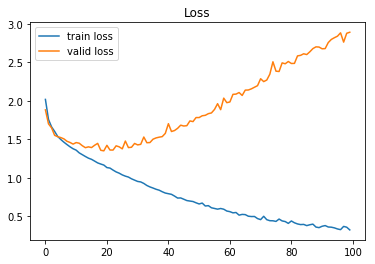

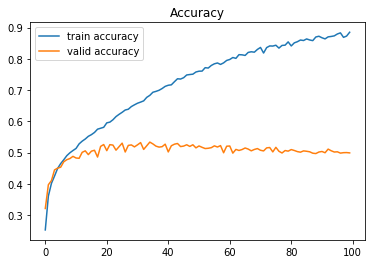

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()